## Feature Space
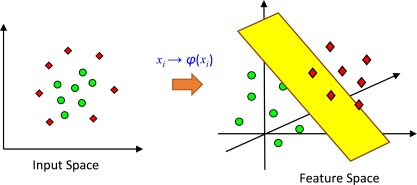
### 1. **Representer Theorem**:
  - **Theorem**: 
    - reproducing kernel Hilbert space (RKHS) ${\displaystyle H}$ ( a Hilbert space of functions that if 2 functions $ \mathcal{f, g} $ in it are close in norm, e.g. $ \mathcal{\|f-g\|} $, then 2 functions are also point-wise close for all x, e.g. $\mathcal{|f(x)-g(x)| \forall{x}}$ ) 
    - positive-definite real-valued kernel function $ {\displaystyle K(x, x'):{\mathcal {X}}\times {\mathcal {X}}\to \mathbb {R} }$ on a non-empty set ${\displaystyle {\mathcal {X}}}$ with corresponding space ${\displaystyle H_{k}}$
    - a training sample ${\displaystyle (x_{1},y_{1}),\dotsc ,(x_{n},y_{n})\in {\mathcal {X}}\times \mathbb {R} } $
    - a strictly increasing real-valued function (regularization parameter) ${\displaystyle g\colon [0,\infty )\to \mathbb {R} }$
    - an arbitrary loss/error function ${\displaystyle L\colon ({\mathcal {X}}\times \mathbb {R} ^{2})^{n}\to \mathbb {R} \cup \lbrace \infty \rbrace }$
    - a regularized empirical risk minimization problem of the form:
     $$
    \min_{f \in \mathcal{H}} \left[ 
    \sum_{i=1}^n L(x_i, y_i, f(x_i)) + 
    \underbrace{\lambda \|f\|_{\mathcal{H}}^2}_{\begin{array}{c}
    \text{anti-overfitting} \\
    \text{less-variance-more-bias} \\
    \text{unique-solution}
    \end{array}}
    \right],
     $$
     the solution $ f^* $ has the form:
     $$
     f^*(x) = \sum_{i=1}^n \alpha_i K(x_i, x),
     $$
     where $ \alpha_i \in \mathbb{R} $ are coefficients determined by the optimization process.

    | **Kernel Function** | **Type of Classifier** |
    |---------------------|------------------------|
    | $K(x_i, x_j) = (x_i^T x_j)^\rho$                                   | Linear |
    | $K(x_i, x_j) = (x_i^T x_j + 1)^\rho$                               | Complete polynomial of degree $\rho$ |
    | $K(x_i, x_j) = \tanh(\gamma x_i^T x_j + \mu)$                      | Multilayer perceptron |
    | $K(x_i, x_j) = \exp(-\|x_i - x_j\|^2 / 2\sigma^2)$                 | Gaussian RBF |
    | $K(x_i, x_j) = \frac{\sin((n+1/2)(x_i-x_j))}{2\sin((x_i-x_j)/2)}$  | Dirichlet |
    | $K(x_i, x_j) = \tanh(\alpha (x_i \cdot x_i) + \vartheta)$          | Sigmoid |


  - **implications**: The Representer Theorem implies that even though the function space in which we are searching for the optimal solution may be infinite-dimensional (as in the case of RKHS), the optimal solution can still be expressed as a finite linear combination of the training points. This drastically reduces the complexity of the problem, making it computationally feasible to solve. It also means that the problem of learning from data can be effectively reduced to optimizing a finite number of coefficients (the Lagrange multipliers in the dual problem).

### 2. **Dual Representation in SVMs**:
   - **implications**: The dual representation of SVMs allows the use of kernel functions to handle non-linearly separable data. Instead of directly working with the potentially high-dimensional or even infinite-dimensional feature vectors, SVMs can operate in the original space by computing only the inner products via the kernel function. This dual approach also highlights the role of support vectors, as only a subset of the training data (those with non-zero Lagrange multipliers) influences the final model, leading to a sparse solution that is easier to compute and interpret.

### 3. **Kernel Trick**:
   - **implications**: The kernel trick enables the extension of linear algorithms to non-linear problems without explicitly mapping the data into a high-dimensional feature space. This not only avoids the "curse of dimensionality" but also allows for more flexible and powerful models. The kernel trick is foundational in SVMs, Gaussian processes, and many other machine learning algorithms. It allows us to apply linear algorithms in a transformed space, where the data might be linearly separable, without ever computing the transformation explicitly.

### 4. **Mercer's Theorem**:
   - **implications**: Mercer's Theorem provides a rigorous foundation for the use of kernel functions in SVMs and other kernel-based methods. It ensures that any valid kernel function corresponds to a dot product in some feature space, guaranteeing that the kernel method is well-defined and that the optimization problems are convex. This is crucial for ensuring that the solutions found by SVMs are optimal and that the algorithms converge to a global minimum.

### 5. **Computational Superiority of Linear Methods**:
   - **implications**: Linear methods are computationally efficient, especially in high-dimensional spaces, because they involve simple linear algebra operations. However, their expressive power is limited, as they can only model linear relationships in the data. The kernel trick extends this computational efficiency to non-linear models by implicitly operating in a higher-dimensional space where linear methods can be applied. This allows for the handling of more complex, non-linear data without sacrificing the computational advantages of linear models.


## Decision Tree

| **Algorithm**                        | **Splitting Criterion**                                              | **Handling of Continuous Data**  | **Pruning**                                              | **Overfitting Avoidance**                         | **Tree Shape**               | **Pure** | **Special Features**                                                                                                           |
|--------------------------------------|----------------------------------------------------------------------|----------------------------------|----------------------------------------------------------|---------------------------------------------------|-----------------------------|----------|--------------------------------------------------------------------------------------------------------------------------------|
| **ID3 (Iterative Dichotomiser 3)**   | Information Gain (based on entropy)                                  | Limited; requires discretization | No pruning                                               | Prone to overfitting                              | Unbalanced, shallow          | No       | Early and simple method, works well with categorical data, but not as effective with continuous data.                           |
| **C4.5**                             | Gain Ratio (modification of information gain)                        | Directly handles continuous data | Yes, post-pruning using error-based pruning              | Reduced overfitting compared to ID3              | Balanced to moderately deep | No       | Successor of ID3, supports continuous data, missing values, and pruning, making it more robust.                                 |
| **CART (Classification and Regression Tree)** | Gini Impurity (for classification) or Mean Squared Error (for regression) | Directly handles continuous data | Yes, cost-complexity pruning                             | Cross-validation to avoid overfitting            | Balanced, binary structure  | No       | Handles both classification and regression, binary splits only, used in many modern ML libraries.                               |
| **OC1 (Oblique Classifier 1)**       | Linear combination of attributes (multivariate splits)               | Directly handles continuous data | No explicit pruning mechanism                            | Less prone to overfitting due to multivariate splits | Unbalanced, complex structure | No       | First to introduce multivariate splits, allowing more complex decision boundaries.                                               |
| **CHAID (Chi-square Automatic Interaction Detection)** | Chi-square test for independence                                | Limited; requires discretization | No pruning, but uses significance levels to control tree size | Controls tree size through significance levels  | Multi-level, bushy           | No       | Performs multi-level splits, handles categorical predictors well, less emphasis on continuous data.                             |
| **MARS (Multivariate Adaptive Regression Splines)** | Uses piecewise linear regression                                | Directly handles continuous data | Implicit pruning via backward elimination                | Reduces overfitting through regularization       | Spline-based, not tree-shaped | No       | Extends decision trees to handle complex interactions with continuous variables, ideal for regression tasks.                    |
| **Conditional Inference Trees**      | Statistical tests (e.g., permutation tests)                          | Directly handles continuous data | No pruning required                                      | Avoids overfitting through unbiased selection    | Balanced to unbalanced       | Yes      | Corrects for multiple testing, unbiased, statistically sound method, no need for pruning.                                      |


### **Splitting Criterion**
#### loss functions
- Information Gain
$$
\underbrace{\mathbb{E}_A(\mathbb{IG}(T, a))}_{\text{expected information gain}} 
= \underbrace{\mathbb{I}(T; A)}_{\text{mutual information between $T$ and $A$}} 
= \mathbb{E}_A(\underbrace{\mathbb{IG}(T, a)}_{\text{Information Gain}})
= \mathbb{E}_A(\underbrace{\mathbb{H}(T)}_{\text{entropy (parent)}} - \underbrace{\mathbb{H}(T \mid a)}_{\text{sum of entropies (children)}}) \\
= \underbrace{\mathbb{H}(T)}_{\text{entropy (parent)}} - \underbrace{\mathbb{H}(T \mid A)}_{\text{weighted sum of entropies (children)}}\\
= \mathbb{E}_A(- \sum_{i=1}^{J} p_i \log_2 p_i - \sum_{i=1}^{J} \text{Pr}(i \mid a) \log_2 \text{Pr}(i \mid a))\\
= - \sum_{i=1}^{J} p_i \log_2 p_i - \sum_{a} p(a) \sum_{i=1}^{J} \text{Pr}(i \mid a) \log_2 \text{Pr}(i \mid a)
$$

- Gini Impurity (simplified Info Gain)
$$
I_G(p) = \sum_{i=1}^J \left(p_i \sum_{k\neq i} p_k\right) = \sum_{i=1}^J p_i(1 - p_i) = \sum_{i=1}^J (p_i - p_i^2) = \sum_{i=1}^J p_i - \sum_{i=1}^J p_i^2 = 1 - \sum_{i=1}^J p_i^2.
$$
#### criterion
  - solve for splitting

    Given training vectors $ x_i \in \mathbb{R}^n $ for $ i = 1, \dots, l $ and a label vector $ y \in \mathbb{R}^l $, a decision tree 
    recursively partitions the 
    feature space such that the samples with the same labels or similar target values are grouped together.
    Let the data at node $ m $ be represented by $ Q_m $ with $ n_m $ samples. For each candidate split $ \theta = (j, t_m) $ consisting of a 
    feature $ j $ and 
    threshold $ t_m $, partition the data into $ Q_m^{\text{left}}(\theta) $ and $ Q_m^{\text{right}}(\theta) $ subsets:
    $$
    Q_m^{\text{left}}(\theta) = \{(x, y) \,|\, x_j \leq t_m \}
    Q_m^{\text{right}}(\theta) = Q_m \setminus Q_m^{\text{left}}(\theta)
    $$
    The quality of a candidate split at node $ m $ is then computed using an impurity function or loss function $ H(\cdot) $, the choice of 
    which depends on the task 
    being solved (classification or regression):
    $$
    G(Q_m, \theta) = \frac{n_m^{\text{left}}}{n_m} H(Q_m^{\text{left}}(\theta)) + \frac{n_m^{\text{right}}}{n_m} H(Q_m^{\text{right}}(\theta))
    $$
    Select the parameters that minimize the impurity:
    $$
    \theta^* = \underset{\theta}{\text{argmin}} \, G(Q_m, \theta)
    $$
    Recurse for subsets $ Q_m^{\text{left}}(\theta^*) $ and $ Q_m^{\text{right}}(\theta^*) $ until the maximum allowable depth is reached, $ 
    n_m < \text
    {min\_samples} $ or $ n_m = 1 $.

### **Discretization (regression to classification)**
- Variance Reduction

  For a node $N$, the total reduction of the variance of the target variable $Y$ due to the split at this node:
  $$
  I_V(N) = \frac{1}{|S|^2} \sum_{i \in S} \sum_{j \in S} \frac{1}{2}(y_i - y_j)^2 - \left(\frac{|S_t|^2}{|S|^2} \frac{1}{|S_t|^2} \sum_{i   \in S_t} \sum_{j \in S_t} \frac{1}{2}(y_i - y_j)^2 + \frac{|S_f|^2}{|S|^2} \frac{1}{|S_f|^2} \sum_{i \in S_f} \sum_{j \in S_f} \frac{1}{2}  (y_i - y_j)^2\right)
  $$
  where $S$, $S_t$, and $S_f$ are the set of presplit sample indices, set of sample indices for which the split test is true, and set of  sample indices for which the split test is false, respectively. Each of the above summands are indeed variance estimates, though, written  in a form without directly referring to the mean.
  By replacing $(y_i - y_j)^2$ in the formula above with the dissimilarity $d_{ij}$ between two objects $i$ and $j$, the variance reduction   criterion applies to any kind of object for which pairwise dissimilarities can be computed.

## **Ensemble Methods**

| **Aspect**                         | **Bagging**                                    | **Boosting**                                | **Random Forest**                           | **AdaBoost**                               | **Gradient Boosting**                       | **Stacking**                                | **Voting**                                 | **Blending**                               |
|------------------------------------|------------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|---------------------------------------------|
| **Definition**                     | Combines multiple models trained independently on bootstrapped data to reduce variance. | Sequentially builds models, each focusing on correcting errors of the previous ones, to reduce bias and variance. | A collection of decision trees trained on random subsets of data and features to reduce variance. | A boosting technique focusing on hard-to-classify instances by adjusting weights. | Iteratively minimizes a loss function by correcting residual errors of previous models. | Combines predictions from multiple models using a meta-learner for final output. | Aggregates predictions from various models using majority vote or averaging. | Similar to stacking but uses a holdout dataset to train the meta-learner. |
| **Year Introduced**                | 1996                                           | 1990 (AdaBoost), 1999 (GBM)                 | 2001 (Leo Breiman)                          | 1995                                        | 1999 (Friedman)                             | 1996 (Wolpert)                              | N/A                                        | N/A                                        |
| **Main Goal**                      | Reduce variance and improve model stability.   | Reduce bias and variance to improve accuracy. | Reduce variance and enhance accuracy.       | Reduce bias and improve accuracy, particularly in binary classification. | Enhance predictive power by reducing bias and variance. | Leverage diverse models to enhance overall performance. | Increase robustness by combining diverse models. | Simplify ensemble learning while avoiding data leakage. |
| **Base Learners**                  | Typically Decision Trees, but can be any model | Usually Decision Trees (e.g., stumps), but flexible | Decision Trees                             | Typically Decision Trees (stumps)           | Decision Trees, but flexible                | Any combination of models (heterogeneous)   | Any combination of models (heterogeneous)   | Any combination of models (heterogeneous)   |
| **Aggregation Technique**          | Averaging for regression, majority voting for classification. | Weighted majority voting or weighted averaging of predictions. | Averaging for regression, majority voting for classification. | Weighted majority voting. | Weighted averaging of predictions.           | Meta-learner (e.g., logistic regression, SVM). | Majority voting for classification, averaging for regression. | Meta-learner trained on a holdout set. |
| **Diversity in Base Learners**     | Typically homogeneous, but can vary.           | Typically homogeneous, but flexible.        | Homogeneous (trees).                        | Homogeneous (trees).                        | Homogeneous or mildly heterogeneous.         | Highly heterogeneous.                       | Highly heterogeneous.                       | Highly heterogeneous.                       |
| **Data Sampling**                  | Bootstrap sampling of data subsets.            | No sampling; sequential processing of the full dataset. | Bootstrap sampling of data and features.    | No sampling; full data is used sequentially. | No sampling; full data is used sequentially. | Data split into training and validation sets. | No data splitting required.                 | Data split into training and holdout set.   |
| **Handling of Outliers**           | Reduces impact by averaging.                   | Can focus on outliers, leading to potential overfitting. | Reduces impact by averaging.                | Sensitive to outliers, can overfit.         | Can be sensitive to outliers; depends on the base learner. | Depends on the models used.                 | Depends on the models used.                 | Depends on the models used.                 |
| **Handling Missing Data**          | Managed by base learners.                      | Managed by base learners.                   | Handles missing data well within trees.     | Managed by base learners.                   | Handles missing data well within trees.      | Managed by base learners.                   | Managed by base learners.                   | Managed by base learners.                   |
| **Computational Complexity**       | Moderate                                       | High due to sequential processing.          | High due to the large number of trees.      | Moderate, proportional to the number of iterations. | High due to iterative nature and complexity. | High, depends on base models and meta-learner. | Low to moderate, depending on model count.  | Moderate, influenced by holdout set size.   |
| **Training Time**                  | Proportional to the number of models and data size. | Increases significantly with the number of iterations. | Proportional to the number of trees.        | Proportional to the number of iterations.   | Increases with the number of iterations.     | Depends on base models and meta-learner.    | Low to moderate depending on model count.   | Moderate, influenced by the size of the holdout set. |
| **Memory Usage**                   | Moderate, depends on base learners.            | High, due to storing sequential models.     | High, due to storing multiple trees.        | Moderate, proportional to model complexity. | High, due to storing multiple models.        | High, depends on base models and meta-learner. | Moderate, depends on the number of models.  | Moderate, influenced by holdout set size.   |
| **Parallelization**                | Easily parallelizable across models.           | Difficult due to sequential nature.         | Easily parallelizable across trees.         | Difficult to parallelize due to sequential nature. | Difficult to parallelize due to sequential nature. | Possible across base learners.              | Easily parallelizable across models.        | Limited parallelization due to holdout set. |
| **Performance**                    | Improves stability, reduces variance.          | Improves accuracy by reducing bias and variance. | High accuracy, good generalization.         | High accuracy, particularly for binary classification. | State-of-the-art performance in many cases.  | Highly dependent on base learners and meta-learner. | Depends on diversity and quality of base models. | Similar to stacking, but typically less robust. |
| **Sensitivity to Noise**           | Less sensitive due to averaging.               | Can be sensitive, especially in AdaBoost.   | Robust against noise due to averaging.      | Sensitive to noise and outliers, can overfit. | Can be sensitive, but regularization helps.  | Dependent on the base models used.           | Less sensitive due to model diversity.       | Less sensitive due to model diversity.       |
| **Overfitting Tendency**           | Low, due to averaging.                         | Can overfit if not properly tuned.          | Low, if trees are not too deep.             | Can overfit if weak learners are too strong. | Can overfit if not properly regularized.     | Can overfit, especially with complex meta-learners. | Low to moderate, depends on base models.    | Can overfit, especially if the holdout set is small. |
| **Interpretability**               | Moderate, depending on base learners.          | Low, due to model complexity.               | Low, due to the ensemble of trees.          | Low, complex due to the sequential nature.  | Low, especially with complex models.         | Low to moderate, depending on models used.   | Moderate, but depends on model selection.   | Moderate, but less interpretable than stacking. |
| **Flexibility in Base Learners**   | Typically homogeneous but flexible.            | Flexible, though often decision trees.      | Limited to decision trees.                  | Flexible, though often decision trees.      | Flexible in base learner choice.             | Highly flexible, supports heterogeneous models. | Flexible in base learner choice.            | Flexible in base learner choice.            |
| **Flexibility in Hyperparameters** | Moderate, involves tuning tree depth, number of models, etc. | High, requires careful tuning of learning rate, number of iterations, etc. | Moderate, involves tuning tree depth, number of trees, etc. | High, involves tuning learning rate, number of iterations, etc. | High, involves tuning learning rate, number of iterations, regularization, etc. | High, due to flexibility in base models and meta-learner. | Moderate, involves selection and tuning of base models. | Moderate, similar to stacking but simpler.  |
| **Use Cases**                      | Suitable for reducing variance in high-dimensional data, often used with decision trees. | Common in competitions and scenarios requiring high accuracy, like fraud detection, medical diagnosis. | Effective in tasks with high-dimensional or complex data, widely used in tabular data tasks. | Effective for binary classification problems, e.g., spam detection, credit scoring. | Used for regression and classification in tasks requiring high performance, e.g., ranking, forecasting. | Applied in complex tasks where combining diverse models improves overall performance, e.g., machine learning competitions. | Suitable for scenarios requiring a simple ensemble of models, e.g., preliminary model combination. | Useful in practical scenarios where simplicity and avoidance of data leakage are priorities. |


## **XGBoost**
### Newton-Raphson Method

- Theorem:

  Let $ f : \mathbb{R}^n \rightarrow \mathbb{R} $ be a twice-differentiable function. Suppose $ x^* $ is a local minimum of $ f(x) $ and $ x^* $ satisfies the first-order necessary condition $ \nabla f(x^*) = 0 $. If the Hessian matrix $ H = \nabla^2 f(x^*) $ is positive definite, then there exists a sequence $ \{x_k\} $ generated by Newton's Method that converges quadratically to $ x^* $ when the initial guess $ x_0 $ is sufficiently close to $ x^* $.

- Iteration:
  $$
  x_{k+1} = x_k - H^{-1}(x_k) \nabla f(x_k)
  $$
  where:
  $ \nabla f(x_k) $ is the gradient of $ f(x) $ at $ x_k $
  $ H(x_k) = \nabla^2 f(x_k) $ is the Hessian matrix of $ f(x) $ at $ x_k $

- Example:
  1. finding roots(1D):
  $$
  x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
  $$
  2. finding local min(1D)
  $$
  x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
  $$

- Convergence Conditions:

  1. **Twice-Differentiability of the Function $ f(x) $**:
     - The function $ f(x) $ must be twice continuously differentiable in a neighborhood around the solution $ x^* $.
  
  2. **Local Convexity (Positive Definiteness of Hessian)**:
     - The Hessian matrix $ H(x^*) = \nabla^2 f(x^*) $ must be positive definite at the solution $ x^* $. This ensures that $ x^* $ is a local minimum.
     
  3. **Initial Guess $ x_0 $ Close to the Solution**:
     - The initial guess $ x_0 $ must be sufficiently close to the true solution $ x^* $.
  
  4. **Non-Singularity of the Hessian**:
     - The Hessian $ H(x_k) $ must be non-singular at each iteration $ k $.

- Quadratic Convergence:
  When the above conditions are met, Newton's method converges quadratically. Mathematically, if $ x_0 $ is sufficiently close to $ x^* $,
  $$
  \|x_{k+1} - x^* \| \leq C \|x_k - x^* \|^2,
  $$
  where $ C $ is a constant.

---

### Gradient Boosting

#### Theorem:

Let $ \mathcal{L}(y, F(x)) $ be a differentiable loss function, where $ y $ is the true label, and $ F(x) $ is the predictive model. Gradient Boosting aims to minimize this loss function by iteratively adding a new weak learner $ h_m(x) $ to the ensemble.

The sequence of models $ \{F_m(x)\} $ is constructed such that $ F_{m+1}(x) = F_m(x) + \lambda h_m(x) $, where $ h_m(x) $ is the weak learner fitted to the negative gradient of the loss function at $ F_m(x) $.

#### Iteration:
$$
h_m(x) = -\nabla_{F} \mathcal{L}(y, F_m(x))
$$
$$
F_{m+1}(x) = F_m(x) + \lambda h_m(x)
$$
where:
- $ \nabla_{F} \mathcal{L}(y, F(x)) $ is the gradient of the loss function with respect to the current model $ F(x) $.
- $ \lambda $ is a learning rate parameter that controls the contribution of each weak learner.

#### Convergence Conditions:

1. **Differentiability of the Loss Function $ \mathcal{L}(y, F(x)) $**:
   - The loss function $ \mathcal{L}(y, F(x)) $ should be differentiable with respect to the model $ F(x) $.

2. **Consistency of Weak Learners**:
   - The weak learners $ h_m(x) $ should be capable of approximating the negative gradient $ -\nabla_{F} \mathcal{L}(y, F_m(x)) $ with reasonable accuracy.

3. **Learning Rate $ \lambda $ (Shrinkage Parameter)**:
   - The learning rate $ \lambda $ should be sufficiently small to ensure convergence.

4. **Regularization**:
   - Regularization techniques can help in preventing overfitting and ensuring convergence to a model that generalizes well.

5. **Sufficient Number of Iterations**:
   - A sufficient number of iterations must be performed to allow the model to reach a minimum of the loss function.

#### Convergence Analysis:
Gradient Boosting is typically characterized by linear convergence. The reduction in the loss function decreases approximately linearly with the number of iterations:
$$
\mathcal{L}(y, F_{m+1}(x)) \leq \mathcal{L}(y, F_m(x)) - \lambda \| \nabla_F \mathcal{L}(y, F_m(x)) \|^2
$$
where $ \| \nabla_F \mathcal{L}(y, F_m(x)) \|^2 $ is the squared norm of the gradient.


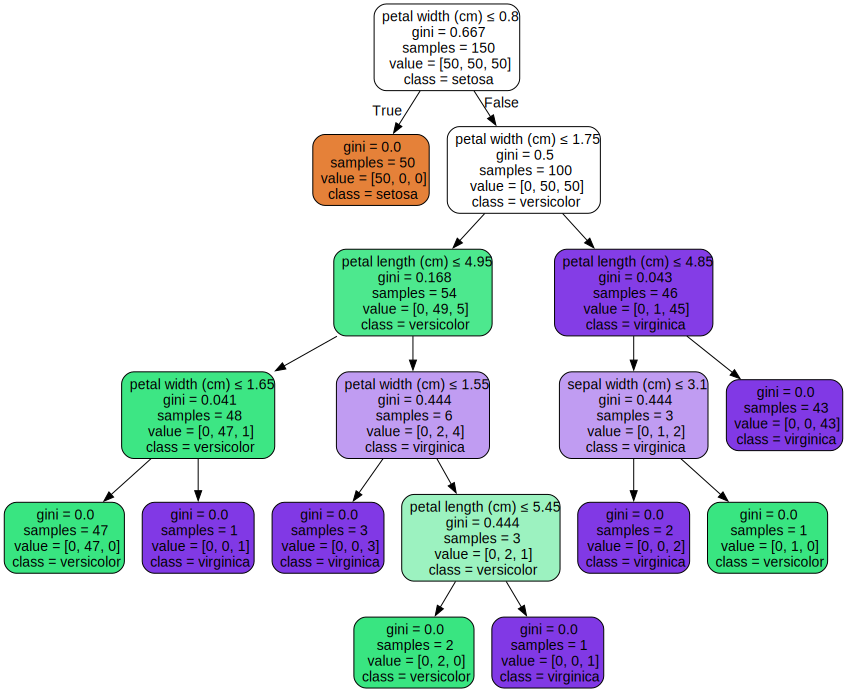

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
import graphviz
# print(graphviz.__file__)
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph